In [18]:
import pandas as pd
import matplotlib.pylab as plt
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv("traffic.csv")

1. Total and Daily Pageview Events

Total pageview events

In [3]:
len(df[df['event'] == "pageview"])

142015

Average number of pageview events per day

In [4]:
num_pageview_events_by_date = df[df['event'] == "pageview"].groupby('date').size()
num_pageview_events_by_date

date
2021-08-19    22366
2021-08-20    21382
2021-08-21    21349
2021-08-22    20430
2021-08-23    18646
2021-08-24    18693
2021-08-25    19149
dtype: int64

In [5]:
num_pageview_events_by_date.mean()

20287.85714285714

2. Distribution of all Events

In [6]:
event_counts = df.groupby('event').size()
event_counts

event
click        55732
pageview    142015
preview      28531
dtype: int64

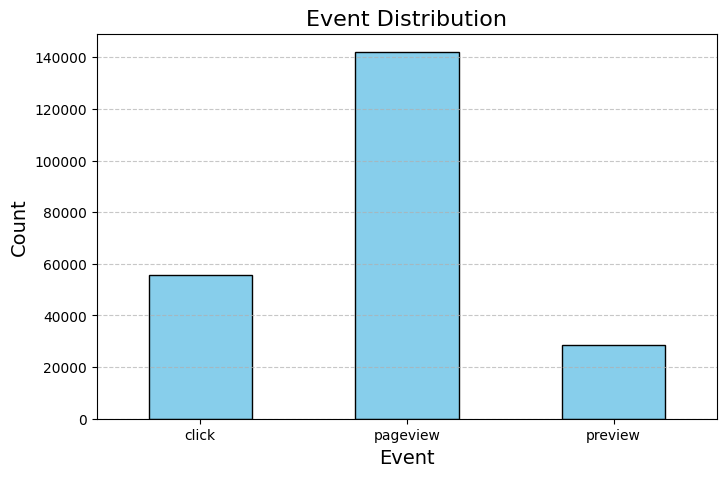

In [7]:
plt.figure(figsize=(8, 5))
event_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Event Distribution', fontsize=16)
plt.xlabel('Event', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

3. Geographical Distribution: Which Countries Contributed to Pageview Event?

In [8]:
pageview_contribution_by_country = df[df['event'] == "pageview"].groupby('country').size()
pageview_contribution_by_country

country
Afghanistan            2
Albania              344
Algeria              443
American Samoa         3
Andorra                2
                    ... 
Wallis and Futuna      1
Yemen                 49
Zambia                68
Zimbabwe              18
Åland                  4
Length: 211, dtype: int64

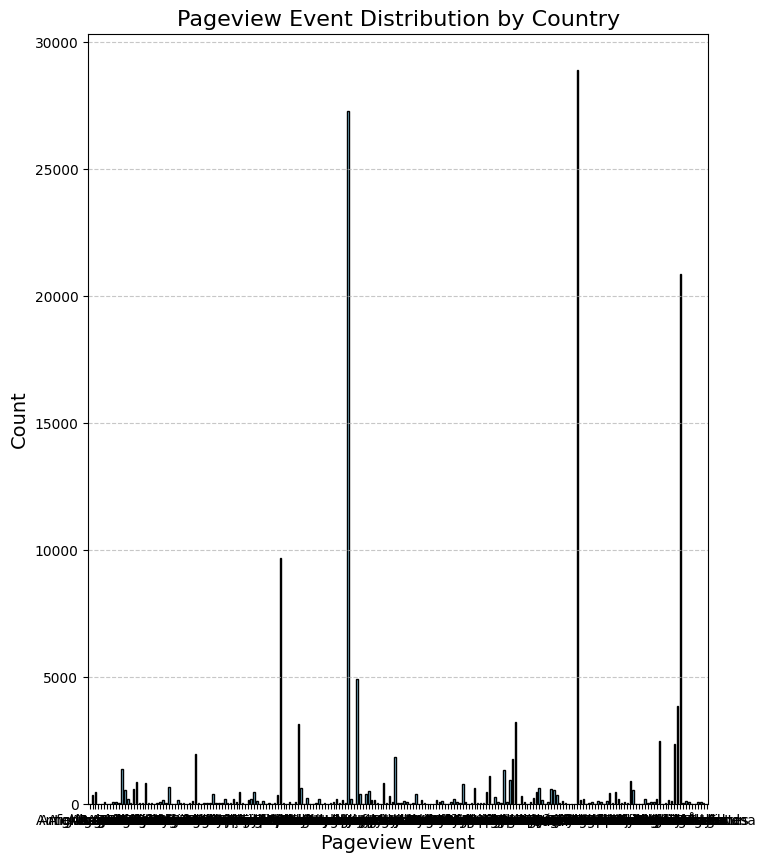

In [9]:
plt.figure(figsize=(8, 10))
pageview_contribution_by_country.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Pageview Event Distribution by Country', fontsize=16)
plt.xlabel('Pageview Event', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

4. CTR Analysis

In [13]:
def calculate_ctr(link_group):
    count_clicks = (link_group['event'] == 'click').sum()
    count_pageviews = (link_group['event'] == 'pageview').sum()
    if count_pageviews == 0:
        return float('inf')
    return count_clicks / count_pageviews

result = df.groupby('linkid').apply(calculate_ctr).reset_index(name='ratio')
result

C:\Users\User\AppData\Local\Temp\ipykernel_6400\1215133545.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = df.groupby('linkid').apply(calculate_ctr).reset_index(name='ratio')


,linkid,ratio
0,00073307-ae96-5089-a117-4783afb42f8e,0.0
1,00126b32-0c35-507b-981c-02c80d2aa8e7,1.0
2,0018cfff-50a1-5984-9715-01ef2d11a49a,0.0
3,0033934b-5d16-5a06-af58-d087bcdd3680,0.0
4,0034d6cf-3bd8-5ffe-aafc-b3959fc48608,0.0
...,...,...
3834,fff38ca0-8043-50cd-a5f1-f65ebb7105c5,1.0
3835,fff4e5f0-4ee5-5fe7-aa30-e870edaf6ed7,0.0
3836,fff84c0e-90a1-59d8-9997-adc909d50e16,1.0
3837,fffc17a7-f935-5d3e-bd3e-d761fd80d479,0.5


5. Correlation Analysis

In [16]:
correlation_df = df[df['event'].isin(['click', 'preview'])]

event_counts = correlation_df.groupby('linkid')['event'].value_counts().unstack(fill_value=0)

event_counts

event,click,preview
linkid,,
00126b32-0c35-507b-981c-02c80d2aa8e7,2,0
004b9724-abca-5481-b6e9-6148a7ca00a5,1,0
0063a982-41cd-5629-96d0-e1c4dd72ea11,2,0
006af6a0-1f0d-4b0c-93bf-756af9071c06,8,11
00759b81-3f04-4a61-b934-f8fb3185f4a0,3,1
...,...,...
ffd8d5a7-91bc-48e1-a692-c26fca8a8ead,29,21
fff38ca0-8043-50cd-a5f1-f65ebb7105c5,1,0
fff84c0e-90a1-59d8-9997-adc909d50e16,1,0


In [17]:
correlation = event_counts.corr(method='pearson')
correlation

event,click,preview
event,,
click,1.000000,0.988681
preview,0.988681,1.000000


The Pearson correlation coefficient between clicks and previews is 0.9887, 
which indicates a very strong positive linear relationship between the two variables. 
This means that as the number of clicks increases for a particular linkid, 
the number of previews tends to increase as well, and vice versa.

In [ ]:
chi2, p, dof, expected = chi2_contingency(event_counts)

print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies: \n{expected}")

Chi-square statistic: 4575.328439793238
p-value: 1.7244206231617332e-155
Degrees of freedom: 2285
Expected frequencies: 
[[1.32281072 0.67718928]
 [0.66140536 0.33859464]
 [1.32281072 0.67718928]
 ...
 [0.66140536 0.33859464]
 [0.66140536 0.33859464]
 [0.66140536 0.33859464]]


# Interpretation:
1. Chi-Square Statistic:

The Chi-square statistic of 4575.33 indicates a significant discrepancy between observed and expected frequencies, suggesting a likely dependence between the variables event (e.g., clicks vs. previews) and linkid.

2. p-value:

The extremely small p-value (1.72 × 10⁻¹⁵⁵) strongly rejects the null hypothesis, providing evidence that event and linkid are not independent.

3. Degrees of Freedom:

The degrees of freedom (2285) reflect the numerous combinations of event and linkid, indicating the test's high complexity due to many categories.

4. Expected Frequencies:

Expected frequencies assume independence between event and linkid, representing how often each event type would occur per linkid under this assumption; significant deviations from these values explain the large Chi-square statistic.